# Akash Biradar : https://in.linkedin.com/in/akash-biradar-73705111b
ASsignement1


**Problem Statement:**  Analysing the time laspe video of day to night transition video and finding how much percenateg of the video is brighter and how much is darker.

Steps to solve the problem:
- Download the video.
- Threshold to find the difference between the day and night.
- Reading the video frame by frame and classifying the frame in to darker and brighter.






link for the video source: https://drive.google.com/drive/folders/1KwJJK_3TrzHRHEMC_JgWo08yvOj_ihBw?usp=sharing

Thresholding : finding the threshold limit to differentiate between the brighter and darker.
- To find the threshold i have conisdered the two images one for the day  and one for the night, based on these images i am setting the limit

Importing the necessary libraries

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

reading the images and converting them to rgb and grey image to see how the variation happens.

In [ ]:
# Day Image
image=cv2.imread(r'/content/drive/MyDrive/images/Day.jpg')  # by default cv2 reads in BGR format
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

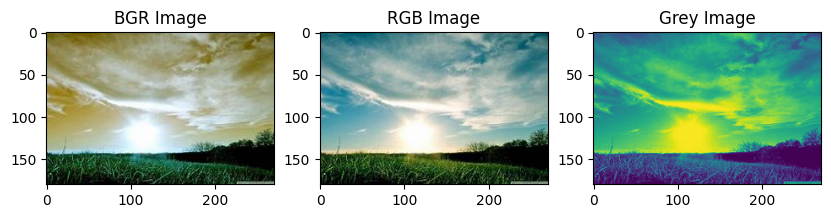

In [ ]:
# BGR Image
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title('BGR Image')
plt.imshow(image)
# RGB Image
plt.subplot(1,3,2)
plt.title('RGB Image')
plt.imshow(image_rgb)
# Grey Image
plt.subplot(1,3,3)
plt.title('Grey Image')
plt.imshow(image_grey)

In [ ]:
# Finding the average of the brightness of the images for all the 3 formats
gbr_array=np.array(image).mean()
rgb_array= np.array(image_rgb).mean()
grey_array= np.array(image_grey).mean()
print(f'BGR:{gbr_array},RGB:{rgb_array},GREY:{grey_array}')

BGR:134.36890946502058,RGB:134.36890946502058,GREY:137.25695473251028


In [ ]:
# NIght Image
image=cv2.imread(r'/content/drive/MyDrive/images/night image.jpg')  # by default cv2 reads in BGR format
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_grey = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

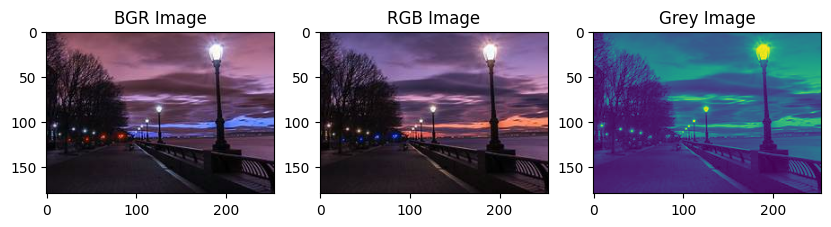

In [ ]:
# BGR Image
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.title('BGR Image')
plt.imshow(image)
# RGB Image
plt.subplot(1,3,2)
plt.title('RGB Image')
plt.imshow(image_rgb)
# Grey Image
plt.subplot(1,3,3)
plt.title('Grey Image')
plt.imshow(image_grey)

In [ ]:
# Finding the average of the brightness of the images for all the 3 formats
gbr_array=np.array(image).mean()
rgb_array= np.array(image_rgb).mean()
grey_array= np.array(image_grey).mean()
print(f'BGR:{gbr_array},RGB:{rgb_array},GREY:{grey_array}')

BGR:70.00678769320501,RGB:70.00678769320501,GREY:64.55647419072616


Based on the cacluation of the average of the pixels it is observed that the average of brightness for the day images is higher and for darker image is lesser. You consider this as the base model where i considered the day and image based on manual selection , need to be fine tuned by hypertuning the threshold based on the selection of the images from the video itself

Readig the video from the source and printing some frames of the images to show the transition.

Total Frames in Video: 1455


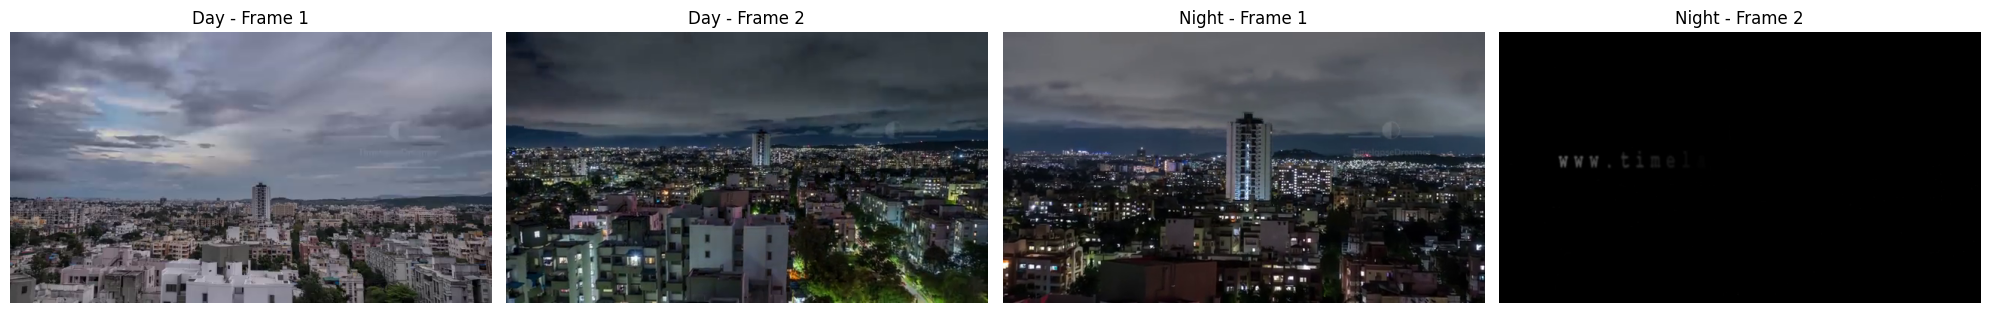

In [ ]:
video_path = '/content/drive/MyDrive/images/WhatsApp Video 2024-11-30 at 21.24.59.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)
# Check if the video is loaded successfully
if not cap.isOpened():
    print("Error: Could not open video .")
else:
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames
    print(f"Total Frames in Video: {total_frames}")

    # Extract 4 frames: early day and late night
    day_frames = [0, int(total_frames * 0.1)]  # Early frames of the video (10% into the video)
    night_frames = [int(total_frames * 0.7), total_frames - 300]  # Late frames (last 20%)
    frames_to_capture = day_frames + night_frames

    extracted_frames = []
    for frame_idx in frames_to_capture:
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)  # Move to specific frame
        ret, frame = cap.read()
        if ret:
            # Convert frame to RGB for Matplotlib
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            extracted_frames.append(frame_rgb)
        else:
            print(f"Error: Could not read frame {frame_idx}")

    cap.release()

    # Plot the extracted frames
    plt.figure(figsize=(20, 10))
    titles = ['Day - Frame 1', 'Day - Frame 2', 'Night - Frame 1', 'Night - Frame 2']

    for i, frame in enumerate(extracted_frames):
        plt.subplot(1, 4, i + 1)
        plt.imshow(frame)
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

I have just shown the images of the transition from day to night just to get an idea

In [1]:
def calculate_brightness(video_path):
    """
    Calculate the number of total frames and compute the average brightness of each frame
    (in grayscale) for a given video.
    Brightness values are constrained between 0 and 255.
    """
    cap = cv2.VideoCapture(video_path)
    brightness = []  # List to store brightness values

    if not cap.isOpened():
        print("Error: Could not open video.")
        return None  # Exit if the video cannot be opened

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Total number of frames in the video
    print(f"Total Frames in Video: {total_frames}")

    for frame_index in range(total_frames):
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)  # Move to the specific frame
        ret, frame = cap.read()
        if ret:
            # Convert frame to grayscale
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Calculate the average brightness of the frame
            mean_brightness = np.mean(frame_gray)
            # Ensure brightness is between 0 and 255 (valid grayscale range)
            brightness.append(mean_brightness)
        else:
            print(f"Error: Could not read frame {frame_index}")

    cap.release()  # Release the video capture object
    return brightness

video_path = '/content/drive/MyDrive/images/WhatsApp Video 2024-11-30 at 21.24.59.mp4'
brightness_values = calculate_brightness(video_path)

if brightness_values:
    print(f"Brightness values (0-255): {brightness_values}")
    print(f"Average Brightness of Video: {np.mean(brightness_values):.2f}")


Total Frames in Video: 1455
Brightness values (0-255): [113.11109809027778, 113.33087239583334, 113.22230902777778, 113.14201822916667, 112.7251171875, 113.18028645833333, 112.87960503472222, 112.86207899305556, 113.13995659722222, 112.8755078125, 113.13934461805556, 112.78556857638888, 113.12246527777778, 112.44680989583334, 112.31383680555555, 111.91016927083334, 112.550078125, 112.19940104166666, 112.28421875, 112.33904079861111, 112.293515625, 112.31638020833333, 112.44634982638888, 112.02040364583333, 111.62978298611111, 111.82498697916667, 112.15013020833334, 111.77517361111111, 112.07671006944445, 111.92355034722222, 112.301953125, 112.68191840277778, 112.56463541666666, 112.50862847222223, 113.20635850694444, 114.12784722222223, 115.13256944444444, 114.34581597222223, 113.92943576388889, 112.45594618055556, 113.09950520833333, 113.33366753472222, 113.80256944444444, 113.96324652777778, 113.49055121527778, 113.46656684027778, 113.6022265625, 113.86833767361111, 113.7133203125, 1

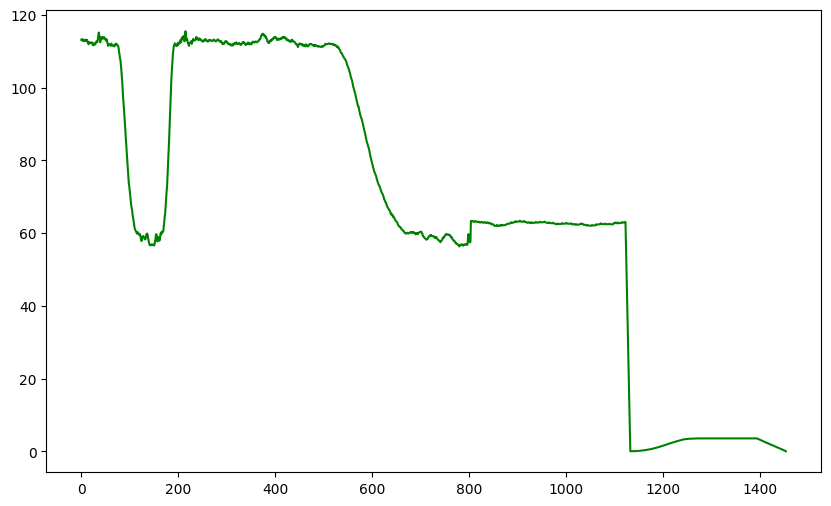

In [6]:
frames = range(len(brightness_values))  # Frame indices

plt.figure(figsize=(10, 6))
plt.plot(frames, brightness_values, label="Average Brightness", color='green')
plt.title("Variation of the brightness progressive frames of the video")

From the average of the brightness of the frames, it is observed that the there is dip in the brighhtness two times when you see for the first time it may be due to sudden atmospheric change as after few frames the brightness has increased suddenly. but after that there is graduall drop in the brightness whihc indictaes that the transition from day to night is happening.

- There are total 1445 frames in the video
- After 500th frame the the trasnition is happening so 500/1445 of the video is brighther
- remaining is the darker video



I am considering the  number of frames in the video as the hyper parameter and how it is affecting the analysis


Total Frames in Video: 1455
Total Frames in Video: 1455
Total Frames in Video: 1455
Total Frames in Video: 1455


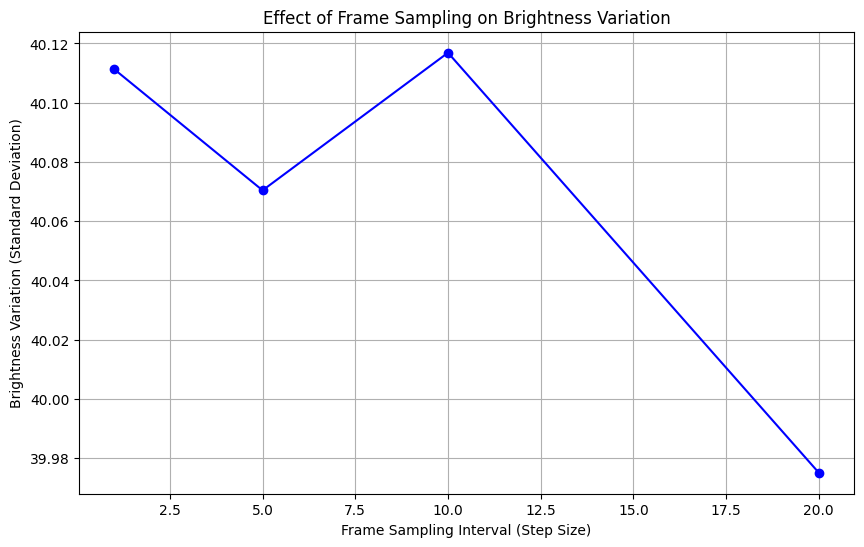

In [7]:

def analyze_brightness_with_sampling(video_path, frame_step):

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return None

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total Frames in Video: {total_frames}")

    avg_brightness = []

    for frame_index in range(0, total_frames, frame_step):  # Sample frames based on frame_step
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)  # Move to the specific frame
        ret, frame = cap.read()
        if not ret:
            print(f"Error: Could not read frame {frame_index}.")
            continue

        # Convert frame to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Calculate the average brightness of the frame
        mean_brightness = np.mean(gray_frame)
        avg_brightness.append(mean_brightness)

    cap.release()
    return avg_brightness

# Test different frame sampling rates
frame_steps = [1, 5, 10, 20]  # Hyperparameter values for frame sampling
variations = []  # Store brightness variations for each frame_step

for step in frame_steps:
    avg_brightness = analyze_brightness_with_sampling(video_path, step)
    if avg_brightness:
        variation = np.std(avg_brightness)  # Calculate brightness variation (standard deviation)
        variations.append(variation)

# Visualize Results
plt.figure(figsize=(10, 6))
plt.plot(frame_steps, variations, marker='o', linestyle='-', color='blue')
plt.title("Effect of Frame Sampling on Brightness Variation")
plt.xlabel("Frame Sampling Interval (Step Size)")
plt.ylabel("Brightness Variation (Standard Deviation)")
plt.grid()
plt.show()
